In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [53]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [108]:
n_classes = 4
n_samples = 400
classnames = ['类别' + str(i+1) for i in range(n_classes)]
seed = 88
x, y, centers = make_blobs(n_samples=n_samples, n_features=2, centers=n_classes, cluster_std=2, center_box=(-20, 20), return_centers=True, random_state=seed)

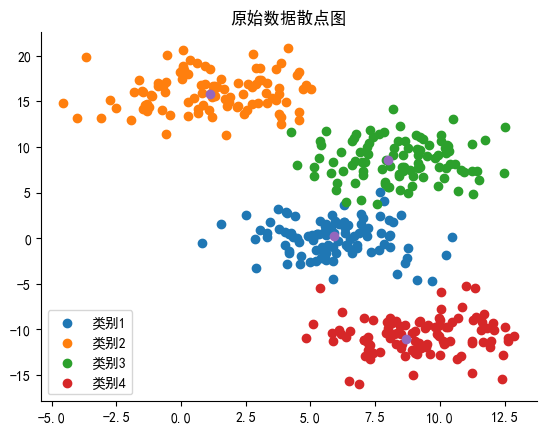

In [109]:
ax = plt.subplot()
for i in range(n_classes):
    samples = x[y==i]
    ax.scatter(x=samples[:,0], y=samples[:,1], label=classnames[i])

ax.scatter(x=centers[:,0], y=centers[:,1])
ax.set_title('原始数据散点图')
ax.spines[['right', 'top']].set_visible(False)
ax.legend()

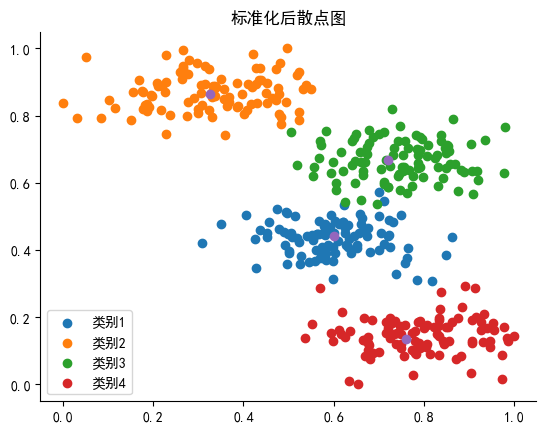

In [117]:
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(x)
scaled_centers = scaler.transform(centers)

ax = plt.subplot()
for i in range(n_classes):
    ax.scatter(x=scaled_x[y==i][:,0], y=scaled_x[y==i][:,1], label=classnames[i])

ax.scatter(scaled_centers[:,0], scaled_centers[:,1])
ax.set_title('标准化后散点图')
ax.spines[['top', 'right']].set_visible(False)
ax.legend()

In [118]:
scaled_x

array([[0.77322499, 0.15377101],
       [0.88259474, 0.6368806 ],
       [0.78460288, 0.31033877],
       [0.91275388, 0.28834929],
       [0.80162437, 0.16939104],
       [0.55412706, 0.42897902],
       [0.66675045, 0.19682474],
       [0.42699033, 0.34615318],
       [0.56124834, 0.39961466],
       [0.18637728, 0.83470623],
       [0.48243877, 0.79743031],
       [0.5816794 , 0.44618197],
       [0.66762297, 0.13194474],
       [0.0836558 , 0.79318723],
       [0.73745224, 0.11946197],
       [0.56958253, 0.72351631],
       [0.78410396, 0.7012039 ],
       [0.83395123, 0.14290809],
       [0.42777942, 0.8932035 ],
       [0.50868032, 0.43934619],
       [0.77334849, 0.59013916],
       [0.33500394, 0.87990283],
       [0.18624307, 0.81408761],
       [0.68181099, 0.39484397],
       [0.63495062, 0.4331556 ],
       [0.78089599, 0.09459968],
       [0.59840047, 0.1302024 ],
       [0.76504913, 0.7038786 ],
       [0.830247  , 0.68282643],
       [0.67637715, 0.46567116],
       [0.

In [119]:
def euclidean(x1, x2):
    return np.sqrt(np.sum(np.power(x1 - x2, 2)))

def manhattan(x1, x2):
    return np.sum(np.abs(x1 - x2))

metrics = {
    'euclidean': euclidean,
    'manhattan': manhattan,
}

index 1
index 2
index 3
index 4
index 5
index 6


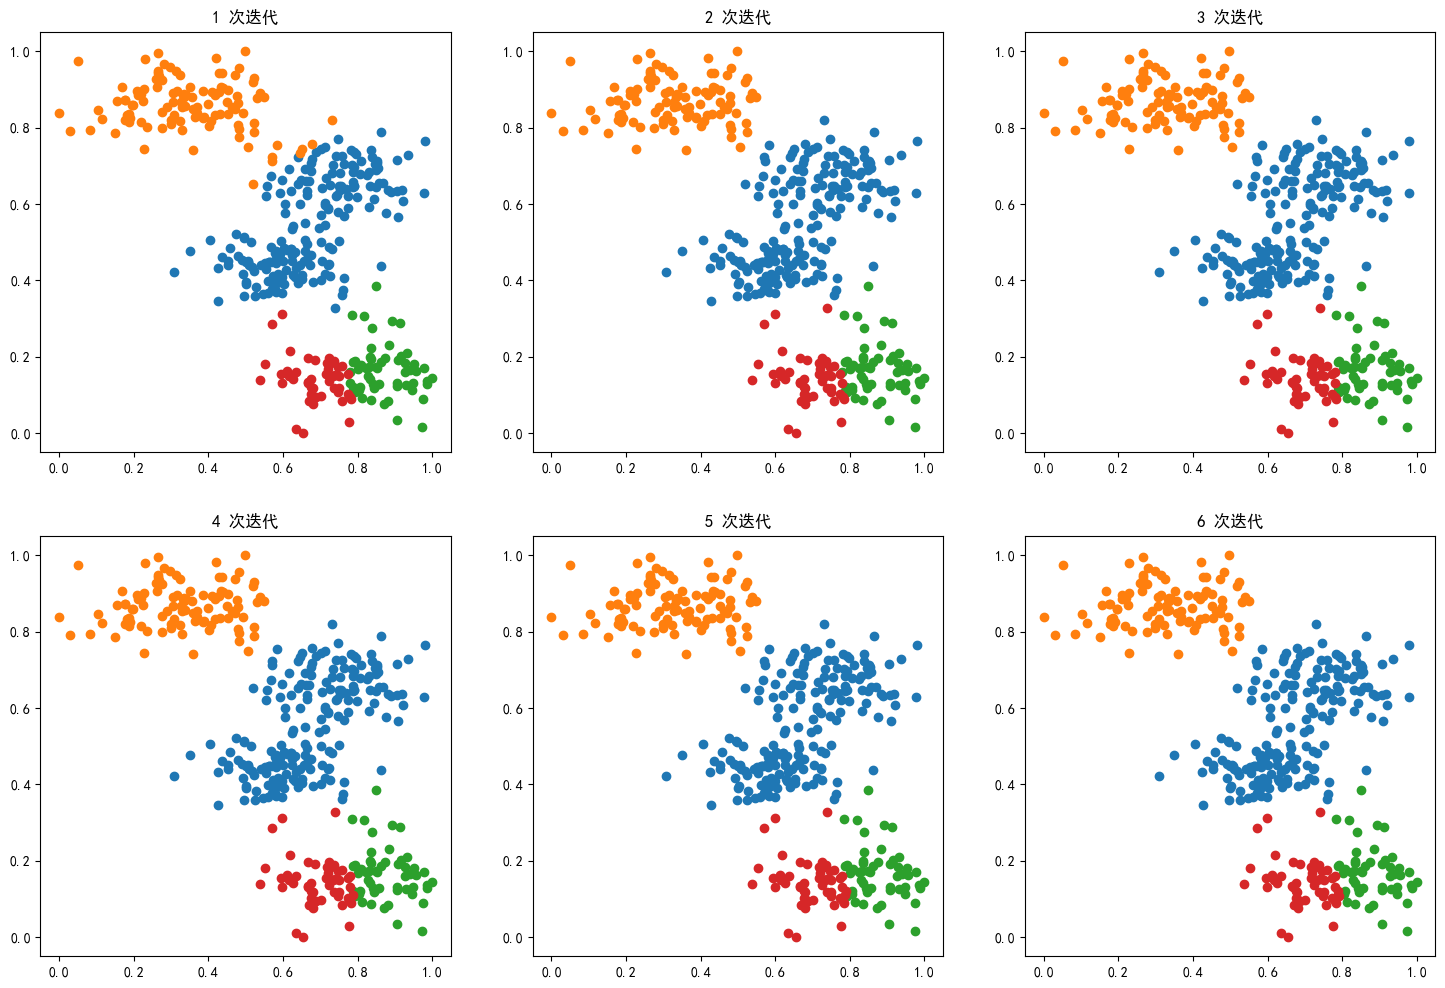

In [144]:
metric_key = 'euclidean'
kmeans_centers = scaled_x[np.random.choice(range(n_samples), n_classes)]
n_iterations = 6

fig, ax = plt.subplots(2, 3, figsize=(18, 12))

for i in range(n_iterations):
    # 计算每一个样本到簇中心的距离
    distance_array = np.zeros((n_classes, n_samples))
    for c, kmeans_center in enumerate(kmeans_centers):
        distance_array[c] = np.array(list(map(lambda x1: metrics[metric_key](x1, kmeans_center), scaled_x)))

    # 计算离样本最近的中心下标，即对应的类别
    tmp_classes = np.argmin(distance_array, axis=0)
    for c in range(n_classes):
        # 重新计算每一个类型的簇中心
        kmeans_centers[c] = np.mean(scaled_x[tmp_classes==c], axis=0)
    if (i + 1) % 1 == 0:
        index = (i + 1) // 1
        print('index', index)
        for c in range(n_classes):
            ax[(index - 1) // 3, (index - 1) % 3].scatter(x=scaled_x[tmp_classes==c][:,0], y=scaled_x[tmp_classes==c][:,1], label=classnames[c])
            ax[(index - 1) // 3, (index - 1) % 3].set_title(f'{i + 1} 次迭代')

# 根据计算所得的最终簇中心对样本进行聚类
distance_array = np.zeros((n_classes, n_samples))
for c, kmeans_center in enumerate(kmeans_centers):
    distance_array[c] = np.array(list(map(lambda x1: metrics[metric_key](x1, kmeans_center), scaled_x)))

final_classes = np.argmin(distance_array, axis=0)

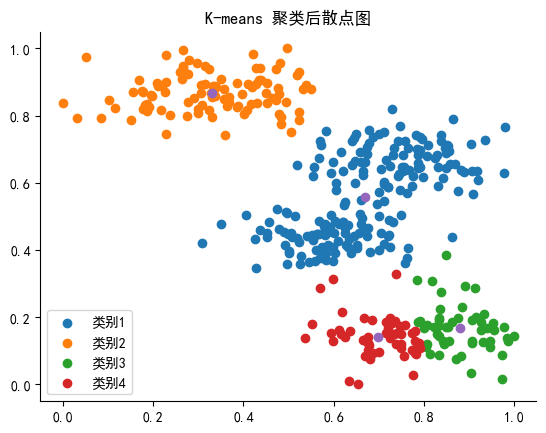

In [145]:
ax = plt.subplot()
for i in range(n_classes):
    ax.scatter(x=scaled_x[final_classes==i][:,0], y=scaled_x[final_classes==i][:,1], label=classnames[i])

ax.scatter(kmeans_centers[:,0], kmeans_centers[:,1])
ax.set_title('K-means 聚类后散点图')
ax.spines[['top', 'right']].set_visible(False)
ax.legend()